In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/Shareddrives/IDS561-BigData/Data/SentiAnalysis_final/Final_Data.csv

/content/drive/Shareddrives/IDS561-BigData/Data/SentiAnalysis_final/Final_Data.csv


In [ ]:
!ls

Clean_Data.csv		 Final_Spark.csv  TSLA_Yahoo_2018_2020.csv
Day_Level_Sentiment.csv  _SUCCESS


In [ ]:
# Initial imports
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.ensemble import GradientBoostingClassifier
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [ ]:
import pandas as pd
df= pd.read_csv('TSLA_Yahoo_2018_2020.csv')

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,new_senti
0,1/2/2018,62.400002,64.421997,62.200001,64.106003,64.106003,21761000,1.0
1,1/3/2018,64.199997,65.050003,63.110001,63.450001,63.450001,22607500,1.0
2,1/4/2018,62.574001,63.709999,61.136002,62.924000,62.924000,49731500,0.0
3,1/5/2018,63.324001,63.448002,62.400002,63.316002,63.316002,22956000,1.0
4,1/8/2018,63.200001,67.403999,63.099998,67.281998,67.281998,49297000,1.0


In [ ]:
df.shape

(755, 8)

In [ ]:
#OHLC Chart with Volume
fig = make_subplots(rows=2, cols=1)
fig.add_trace(go.Ohlc(x=df.Date,
                      open=df.Open,
                      high=df.High,
                      low=df.Low,
                      close=df.Close,
                      name='Price'), row=1, col=1)

fig.add_trace(go.Scatter(x=df.Date, y=df.Volume, name='Volume'), row=2, col=1)

fig.update_layout(title_text="Twt Stock Price and Volume")
fig.update(layout_xaxis_rangeslider_visible=False) 
fig.show()

In [ ]:
# Dataframe with Date, Adj close,  Volume, ts_polarity, twitter_volume of APPL
tsla_df = df[["Date", "Adj Close", "Volume", "new_senti"]]
tsla_df.head()

,Date,Adj Close,Volume,new_senti
0,1/2/2018,64.106003,21761000,1.0
1,1/3/2018,63.450001,22607500,1.0
2,1/4/2018,62.924000,49731500,0.0
3,1/5/2018,63.316002,22956000,1.0
4,1/8/2018,67.281998,49297000,1.0


In [ ]:
#Stock Trend based on difference between current price to previous day price and coverting them to '0' as fall and '1' as rise in stock price
tsla_df['Price Diff'] = tsla_df['Adj Close'].diff()
tsla_df.dropna(inplace = True)
tsla_df['Trend'] = np.where(
    tsla_df['Price Diff'] > 0 , 1, 0)

tsla_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ver

,Date,Adj Close,Volume,new_senti,Price Diff,Trend
1,1/3/2018,63.450001,22607500,1.0,-0.656002,0
2,1/4/2018,62.924000,49731500,0.0,-0.526001,0
3,1/5/2018,63.316002,22956000,1.0,0.392002,1
4,1/8/2018,67.281998,49297000,1.0,3.965996,1
5,1/9/2018,66.737999,35733000,1.0,-0.543999,0


In [ ]:
tsla_df.set_index('Date', inplace = True)

In [ ]:
tsla_df

,Adj Close,Volume,new_senti,Price Diff,Trend
Date,,,,,
1/3/2018,63.450001,22607500,1.0,-0.656002,0
1/4/2018,62.924000,49731500,0.0,-0.526001,0
1/5/2018,63.316002,22956000,1.0,0.392002,1
1/8/2018,67.281998,49297000,1.0,3.965996,1
1/9/2018,66.737999,35733000,1.0,-0.543999,0
...,...,...,...,...,...
12/8/2020,649.880005,64265000,0.0,8.119995,1
12/9/2020,604.479980,71291200,0.0,-45.400025,0
12/10/2020,627.070007,67083200,0.0,22.590027,1


In [ ]:
# Trend is the target varaible

In [ ]:
# Defining features set
X = tsla_df.copy()
X.drop("Trend", axis=1, inplace=True)
X.drop("Price Diff", axis =1, inplace = True)
X.head()

,Adj Close,Volume,new_senti
Date,,,
1/3/2018,63.450001,22607500,1.0
1/4/2018,62.924000,49731500,0.0
1/5/2018,63.316002,22956000,1.0
1/8/2018,67.281998,49297000,1.0
1/9/2018,66.737999,35733000,1.0


In [ ]:
# Defining target vector
y = tsla_df["Trend"].values.reshape(-1, 1)
y[:5]

array([[0],
       [0],
       [1],
       [1],
       [0]])

In [ ]:
# Splitting into Train and Test sets
split = int(0.7 * len(X))

X_train = X[: split]
X_test = X[split:]

y_train = y[: split]
y_test = y[split:]

In [ ]:
# Using StandardScaler to scale features data
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

 Random Forest Classifier Model

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Create RFClassifier model
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

# Fit the model
rf_model = rf_model.fit(X_train_scaled, y_train.ravel())  

In [ ]:
# Make predictions
predictions = rf_model.predict(X_test_scaled)
pd.DataFrame({"Prediction": predictions, "Actual": y_test.ravel()}).head(20)

# Generate accuracy score for predictions using y_test
acc_score = accuracy_score(y_test, predictions)
print(f"Accuracy Score : {acc_score}")

Accuracy Score : 0.5901639344262295


In [ ]:
# Generating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"],
    columns=["Predicted 0", "Predicted 1"]
)

# Displaying results
display(cm_df)

,Predicted 0,Predicted 1
Actual 0,36,25
Actual 1,25,36


In [ ]:
# Generating classification report
print("Classification Report")
print(classification_report(y_test, predictions))

Classification Report
              precision    recall  f1-score   support

           0       0.59      0.59      0.59        61
           1       0.59      0.59      0.59        61

    accuracy                           0.59       122
   macro avg       0.59      0.59      0.59       122
weighted avg       0.59      0.59      0.59       122



Gradient Booster Model

In [ ]:
# Choosing learning rate
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    model = GradientBoostingClassifier(n_estimators=20,
                                      learning_rate=learning_rate,
                                      max_features=2,
                                      max_depth=3,
                                      random_state=0)
    model.fit(X_train_scaled,y_train.ravel())
    print("Learning rate: ", learning_rate)
    
    # Scoring the model
    print("Accuracy score (training): {0:.3f}".format(
        model.score(
            X_train_scaled, 
            y_train.ravel())))
    print("Accuracy score (validation): {0:.3f}".format(
        model.score(
            X_test_scaled, 
            y_test.ravel())))
    print()

Learning rate:  0.05
Accuracy score (training): 0.686
Accuracy score (validation): 0.533

Learning rate:  0.1
Accuracy score (training): 0.735
Accuracy score (validation): 0.533

Learning rate:  0.25
Accuracy score (training): 0.837
Accuracy score (validation): 0.549

Learning rate:  0.5
Accuracy score (training): 0.890
Accuracy score (validation): 0.525

Learning rate:  0.75
Accuracy score (training): 0.908
Accuracy score (validation): 0.557

Learning rate:  1
Accuracy score (training): 0.919
Accuracy score (validation): 0.516



In [ ]:
# Creating GradientBoostingClassifier model
classifier = GradientBoostingClassifier(n_estimators=20,
                                        learning_rate=1,
                                        max_depth=3,
                                        random_state=0)

# Fitting the model
classifier.fit(X_train_scaled, y_train.ravel())    
# Scoring the model
print("Accuracy score (training): {0:.3f}".format(
    model.score(
        X_train_scaled, 
        y_train)))
print("Accuracy score (validation): {0:.3f}".format(
    model.score(
        X_test_scaled, 
        y_test)))

Accuracy score (training): 0.919
Accuracy score (validation): 0.516


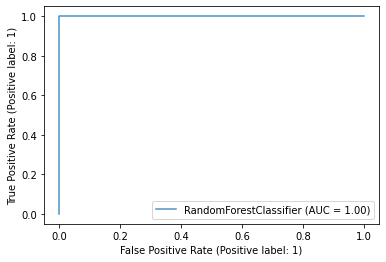

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import RocCurveDisplay
rfc = RandomForestClassifier(n_estimators=10, random_state=42)
rfc.fit(X_train, y_train)
ax = plt.gca()
rfc_disp = RocCurveDisplay.from_estimator(rfc, X_test, y_test, ax=ax, alpha=0.8)
plt.show()

Predictions Using the Gradient Booster Mode

In [ ]:
# Making predictions
predictions = classifier.predict(X_test_scaled)
pd.DataFrame({"Prediction": predictions, "Actual": y_test.ravel()}).head(20)

# Generating accuracy score for predictions using y_test
acc_score = accuracy_score(y_test, predictions)
print(f"Accuracy Score : {acc_score}")

Accuracy Score : 0.5


Model Evaluation

In [ ]:
# Generating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"],
    columns=["Predicted 0", "Predicted 1"]
)

# Displaying results
display(cm_df)

,Predicted 0,Predicted 1
Actual 0,39,22
Actual 1,39,22


In [ ]:
# Generating classification report
print("Classification Report")
print(classification_report(y_test, predictions))

Classification Report
              precision    recall  f1-score   support

           0       0.50      0.64      0.56        61
           1       0.50      0.36      0.42        61

    accuracy                           0.50       122
   macro avg       0.50      0.50      0.49       122
weighted avg       0.50      0.50      0.49       122



In [ ]:
tsla_df.head()

,Adj Close,Volume,new_senti,Price Diff,Trend
Date,,,,,
1/3/2018,63.450001,22607500,1.0,-0.656002,0
1/4/2018,62.924000,49731500,0.0,-0.526001,0
1/5/2018,63.316002,22956000,1.0,0.392002,1
1/8/2018,67.281998,49297000,1.0,3.965996,1
1/9/2018,66.737999,35733000,1.0,-0.543999,0


In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split


X = tsla_df.drop(['Trend'], axis=1)
y = tsla_df['Trend']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=73)


In [ ]:
# Import the classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_curve, roc_auc_score

# Instantiate the classfiers and make a list
classifiers = [LogisticRegression(random_state=1234), 
               GaussianNB(), 
               KNeighborsClassifier(), 
               DecisionTreeClassifier(random_state=1234),
               RandomForestClassifier(random_state=1234)]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(X_train, y_train)
    yproba = model.predict_proba(X_test)[::,1]
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)




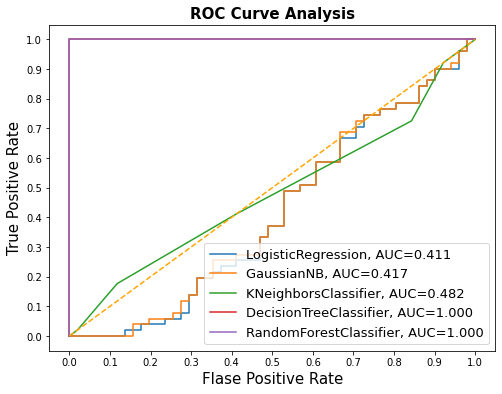

In [ ]:
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

In [ ]:
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()